# Assignment:  Machine Classifier for Email classificaiton 

### Course: CS/DATA 7200 - Machine Learning.
### Instructor: Dr.Qing Tian
### Submitted By: Md Kamrul Islam

### Data Dowload: Data has been dowloaded from the link below https://archive.ics.uci.edu/ml/datasets/Spambase 

In [2]:
## Importing Data
# This data set has variable with binary(spam/on-spam) and some continious variable input. We can read the data file in CSV formate
import pandas as pd
data_email =  pd.read_csv('C:\\Users\\msi\\Desktop\\Machine Learning\\spambase.data', ",", header= None)
data_email

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### However, this data set has 46001 rows and 58 columns; now lets set the header for the data set in csv file. This header name for each column can be found the the "spambase.name" file; we can read and understand the type of data and details from this file. And "spambase.DOCUMENTATION" file aslo give some ideas of the data. We can add header of each column by following way

In [3]:
# For the convaniace I added header for the data set, based on the information available in the  "spambase.name" file
data_email =  pd.read_csv('C:\\Users\\msi\\Desktop\\Machine Learning\\spambase.data', ",", header = None, names=["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove", "word_freq_internet","word_freq_order","word_freq_mail",
"word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report","word_freq_addresses", "word_freq_free", "word_freq_business","word_freq_email", "word_freq_you",
"word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george", "word_freq_650","word_freq_lab", "word_freq_labs",
"word_freq_telnet","word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct",
"word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu", "word_freq_table", "word_freq_conference","char_freq_;",
"char_freq_(","char_freq_[:","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average","capital_run_length_longest","capital_run_length_total","spam"])

data_email.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[:,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
## Let's see the overall scenario of data
data_email.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[:,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
## Now, let's separate the dependent and independant variables
x = data_email.iloc[:, 0:57] ## x is independant or explainatory variables
y = data_email.iloc[:, 57:58] # last column is for spam in binary formate(spam/nonspam =1/0); and it is dependant vairbale 
x.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[:,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3081,0.0,0.68,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.000,0.216,0.108,0.216,0.000,0.108,2.754,25,157
3906,2.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,5.888,29,53
3614,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.500,3,6
1257,0.0,0.00,0.00,0.0,0.32,0.0,0.0,0.32,0.32,0.64,...,0.0,0.000,0.098,0.049,0.492,0.000,0.000,2.184,25,166
2901,0.0,0.00,0.18,0.0,0.09,0.0,0.0,0.00,0.00,0.00,...,0.0,0.143,0.117,0.000,0.000,0.039,0.000,2.313,24,590


In [6]:
y.sample(5)

,spam
3345,0
3304,0
1068,1
187,1
2493,0


### Before diving into the SVM(SVC) model, let's try to visualize independent variables with a relationship with the dependent variable. As independent variables data set has so many dimensions, we can't visualize without transformation. We can run clustering, PCA, MDS, or t-SNE transformation for visualizing our independent variable in contrast with the dependent variable. However as our main focus is to run SMC for spam email detection, it is not wise to demonstrate all visualization techniques. Therefore, to get an initial data distribution idea with spam/non-spam email, I have used PCA and t-SNE to visualize data.

In [7]:
### PCA For Data visualization 
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x)

### Perform the transform
pca_trans = pca.transform(x)

pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
pca_trans_df['spam']=y
pca_trans_df.sample(5)

,pca1,pca2,spam
2515,-274.883026,-5.390788,0
710,1340.686430,-92.682820,1
3617,-278.162536,-0.703635,0
4084,-275.704632,-4.234667,0
835,1463.622400,6.543620,1


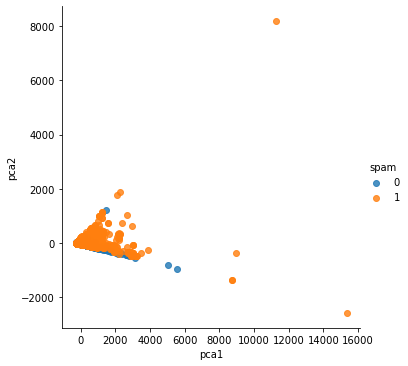

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig = sns.lmplot(x = 'pca1', y='pca2', data=pca_trans_df, hue='spam', fit_reg=False)
plt.show()

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1,perplexity=80, random_state=123)
z = tsne.fit_transform(x) 
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] =z[:,1]
df.sample(10)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 4601 samples in 0.001s...
[t-SNE] Computed neighbors for 4601 samples in 0.494s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4601
[t-SNE] Computed conditional probabilities for sample 2000 / 4601
[t-SNE] Computed conditional probabilities for sample 3000 / 4601
[t-SNE] Computed conditional probabilities for sample 4000 / 4601
[t-SNE] Computed conditional probabilities for sample 4601 / 4601
[t-SNE] Mean sigma: 4.645680
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.064232
[t-SNE] KL divergence after 1000 iterations: 0.499966


,comp-1,comp-2
269,-10.974134,38.581417
363,9.386513,4.974818
2681,-32.480991,30.368113
125,-29.095196,30.168179
3159,8.532104,36.141121
4146,39.220753,-8.362339
4357,12.530497,27.750259
4409,-16.655691,-14.559626
651,2.271045,21.327349
4030,34.162403,-21.016634


[Text(0.5, 1.0, 'Spam vs. Non Spam Visualization ')]

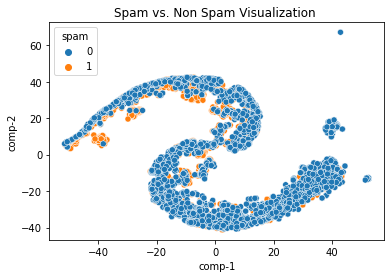

In [10]:
## Visualization using t-SNE transformation reults
sns.scatterplot(x="comp-1", y="comp-2", hue= data_email.spam,
                data=df).set(title="Spam vs. Non Spam Visualization ") 

In [11]:
# model construction, training, and evaluation
# split the data into training and test sets
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

In [12]:
xTrain.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[:,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1173,0.00,0.0,0.00,0.0,0.00,0.00,1.23,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,1.939,0.000,0.000,1.379,8,40
1954,0.67,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.055,0.0,0.000,0.000,0.000,1.644,13,74
256,0.00,0.0,1.42,0.0,0.71,0.00,0.00,0.71,0.00,0.71,...,0.0,0.000,0.000,0.0,0.931,0.000,0.000,12.055,117,217
3341,0.00,0.0,0.24,0.0,0.09,0.04,0.00,0.00,0.04,0.00,...,0.0,0.014,0.148,0.0,0.014,0.044,0.007,2.112,26,1223
4469,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.000,1.500,2,3


In [13]:
xTest.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[:,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3683,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.000,1,3
4412,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.00,0.0,0.71,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.032,2,32
2584,0.00,0.0,0.91,0.0,0.0,0.0,0.0,0.45,0.0,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,1.320,7,103
69,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.201,0.000,0.0,0.1,0.0,4.548,59,141
1844,0.00,0.0,0.54,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.188,0.047,0.0,0.0,0.0,1.745,12,89


### Initially, I have used different kernels and parameters for finding the best SVC classifier for this data set. Then I used several other classifiers to compare the performances of SVC with them.

In [14]:
#from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

Accuracy:0.7541268462206777
ROC auc Score:0.7161896605418873
Precision Score:0.8404255319148937
Recall Score:0.49894736842105264


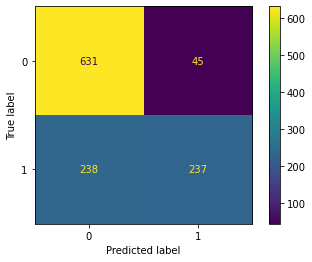

In [15]:
## SVC with rbf kernel
svc = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svc.fit(xTrain, yTrain.values.ravel())
y_pred = svc.predict(xTest)
#from sklearn.metrics import accuracy_score, roc_auc_score, precision score, precision_score, recall_score confusion_matrix, ConfusionMatrixDisplay
# Check the performance
def evalution_matrix(yTest, y_pred): 
    print('Accuracy:'+ str(accuracy_score(yTest, y_pred)))
    print('ROC auc Score:'+ str(roc_auc_score(yTest, y_pred)))
    print('Precision Score:'+ str(precision_score(yTest, y_pred)))
    print('Recall Score:' + str(recall_score(yTest, y_pred)))
evalution_matrix(yTest, y_pred)
cm = confusion_matrix(yTest,y_pred , labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_) 
disp.plot()

Accuracy:0.9322328410078193
ROC auc Score:0.9263453752725008
Precision Score:0.9401330376940134
Recall Score:0.8926315789473684


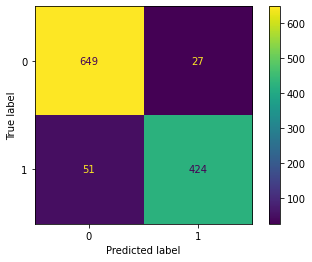

In [16]:
## SVC with linear kernel
svc_2 = SVC(kernel = 'linear', random_state = 10)
svc_2.fit(xTrain, yTrain.values.ravel())
y_pred2 = svc_2.predict(xTest)
def evalution_matrix(yTest, y_pred2): 
    print('Accuracy:'+ str(accuracy_score(yTest, y_pred2)))
    print('ROC auc Score:'+ str(roc_auc_score(yTest, y_pred2)))
    print('Precision Score:'+ str(precision_score(yTest, y_pred2)))
    print('Recall Score:' + str(recall_score(yTest, y_pred2)))

evalution_matrix(yTest, y_pred2)
cm2 = confusion_matrix(yTest,y_pred2 , labels=svc_2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=svc_2.classes_) 
disp2.plot()

Accuracy:0.6429192006950478
ROC auc Score:0.6309047025848646
Precision Score:0.5680851063829787
Recall Score:0.5621052631578948


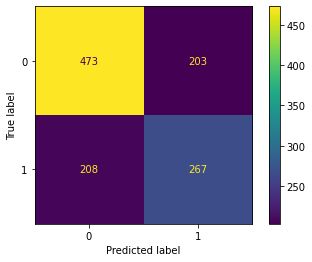

In [17]:
### SVC with sigmoid Kernel
svc3 = SVC(kernel='sigmoid', C=3.0)
svc3.fit(xTrain, yTrain.values.ravel())
y_pred3 = svc3.predict(xTest)

def evalution_matrix3(yTest, y_pred3): 
    print('Accuracy:'+ str(accuracy_score(yTest, y_pred3)))
    print('ROC auc Score:'+ str(roc_auc_score(yTest, y_pred3)))
    print('Precision Score:'+ str(precision_score(yTest, y_pred3)))
    print('Recall Score:' + str(recall_score(yTest, y_pred3)))

evalution_matrix3(yTest, y_pred3)
cm3 = confusion_matrix(yTest,y_pred3 , labels=svc3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=svc3.classes_) 
disp3.plot()

Accuracy:0.6429192006950478
ROC auc Score:0.6309047025848646
Precision Score:0.5680851063829787
Recall Score:0.5621052631578948


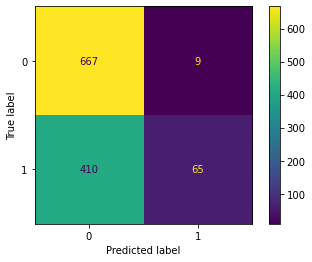

In [18]:
## SVC with polymomial kernel 
svc4 = SVC(kernel='poly', C=1.0)
svc4.fit(xTrain, yTrain.values.ravel())
y_pred4 = svc4.predict(xTest)

def evalution_matrix4(yTest, y_pred3): 
    print('Accuracy:'+ str(accuracy_score(yTest, y_pred3)))
    print('ROC auc Score:'+ str(roc_auc_score(yTest, y_pred3)))
    print('Precision Score:'+ str(precision_score(yTest, y_pred3)))
    print('Recall Score:' + str(recall_score(yTest, y_pred3)))

evalution_matrix4(yTest, y_pred3)
cm4 = confusion_matrix(yTest,y_pred4 , labels=svc4.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=svc4.classes_) 
disp4.plot()

### Based on above result best Kernel is linear function for this data set . However, let's try with Random Forest and  Gaussian Naive Bayes classifer.

Accuracy:0.9591659426585578
ROC auc Score:0.954908128308938
Precision Score:0.9692982456140351
Recall Score:0.9305263157894736


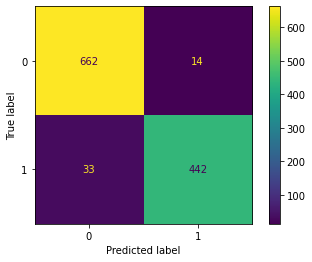

In [19]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(xTrain, yTrain.values.ravel())
y_pred5 = rf_model.predict(xTest)

def evalution_matrix4(yTest, y_pred5): 
    print('Accuracy:'+ str(accuracy_score(yTest, y_pred5)))
    print('ROC auc Score:'+ str(roc_auc_score(yTest, y_pred5)))
    print('Precision Score:'+ str(precision_score(yTest, y_pred5)))
    print('Recall Score:' + str(recall_score(yTest, y_pred5)))

evalution_matrix4(yTest, y_pred5)
cm5 = confusion_matrix(yTest,y_pred5 , labels=rf_model.classes_)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=rf_model.classes_) 
disp5.plot()

Accuracy:0.8271068635968722
ROC auc Score:0.8449859856742447
Precision Score:0.7211538461538461
Recall Score:0.9473684210526315


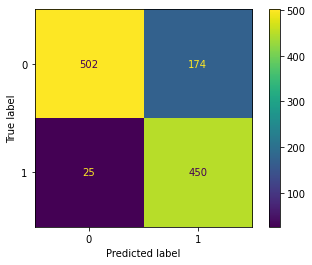

In [20]:
## Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xTrain, yTrain.values.ravel())
 
# making predictions on the testing set
y_predNB = gnb.predict(xTest)
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
def evalution_matrix4(yTest, y_predNB): 
    print('Accuracy:'+ str(accuracy_score(yTest, y_predNB)))
    print('ROC auc Score:'+ str(roc_auc_score(yTest, y_predNB)))
    print('Precision Score:'+ str(precision_score(yTest, y_predNB)))
    print('Recall Score:' + str(recall_score(yTest, y_predNB)))

evalution_matrix4(yTest, y_predNB)
cmNB = confusion_matrix(yTest,y_predNB , labels=gnb.classes_)
dispNB = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=gnb.classes_) 
dispNB.plot()

### Conclusion:
####  Based on the overall scenario Randomforest is the best classifier for this data set. However, we can adopt some other techniques like changing the parameter of SVC, using PCA instead of using original data to increase the accuarcy of the SVM classifier. In some cases, it improves the accuracy of a classifier or model. As it is not asked in the assignment I have not tried it.